In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [4]:
def values_dict_to_list(dict):
    sorted_f1_scores = sorted(dict.items(), key=lambda x: int(x[0].split('x')[0]) * int(x[0].split('x')[1]))

    # Step 2: Extract the F1 scores in the sorted order
    list = [f1_score[0] for _, f1_score in sorted_f1_scores]
    return list

In [3]:
def show_data_division(size_x=192,size_y=192):
    inicio_area_livre_x=size_x+80
    fim_area_livre_x=782
    meio_area_livre_x=(fim_area_livre_x-inicio_area_livre_x)/2 + inicio_area_livre_x
    inicio_area_livre_y=size_y+80
    fim_area_livre_y=590
    meio_area_livre_y=(fim_area_livre_y-inicio_area_livre_y)/2 + inicio_area_livre_y

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    plt.grid(False)

    ax.imshow(np.ones([782,590]), cmap='gray', alpha=0.5)

    # Train data
    rect = patches.Rectangle((0, 0), size_y, size_x, linewidth=2, edgecolor='g', facecolor='g', alpha=0.5)
    ax.add_patch(rect)

    # Validation data
    rect = patches.Rectangle((size_y, 0), 80, size_x, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, size_x), size_y+80, 80, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
    ax.add_patch(rect)



    end_test_start_x=fim_area_livre_x-80
    end_test_start_y=fim_area_livre_y-80
    end_test_end_y=fim_area_livre_y

    start_test_start_x=inicio_area_livre_x
    start_test_start_y=inicio_area_livre_y
    start_test_end_y=inicio_area_livre_y+80

    mid_test_start_x=meio_area_livre_x-40
    mid_test_start_y=meio_area_livre_y-40
    mid_test_end_y=meio_area_livre_y+40


    # Test data end position
    rect = patches.Rectangle((end_test_start_y, 0), 80, end_test_start_x, linewidth=2, edgecolor='none', facecolor='r', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, end_test_start_x), end_test_end_y, 80, linewidth=2, edgecolor='none', facecolor='r', alpha=0.5)
    ax.add_patch(rect)



    # Test data start position
    rect = patches.Rectangle((start_test_start_y, 0), 80, start_test_start_x, linewidth=2, edgecolor='none', facecolor='purple', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, start_test_start_x), start_test_end_y, 80, linewidth=2, edgecolor='none', facecolor='purple', alpha=0.5)
    ax.add_patch(rect)



    # Test data mid position
    rect = patches.Rectangle((mid_test_start_y, 0), 80, mid_test_start_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, mid_test_start_x), mid_test_end_y, 80, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)


    # Add legend
    train_patch = patches.Patch(color='g', label='Training')
    val_patch = patches.Patch(color='b', label='Validation')
    start_test_patch = patches.Patch(color='r', label='Test End')
    mid_test_patch = patches.Patch(color='purple', label='Test Start')
    end_test_patch = patches.Patch(color='yellow', label='Test Mid')


    ax.legend(handles=[train_patch, val_patch, start_test_patch, mid_test_patch, end_test_patch], loc='upper right')

    ax.set_xlim(0, 590)
    ax.set_ylim(782, 0)
    ax.set_title('Data Division')
    plt.show()

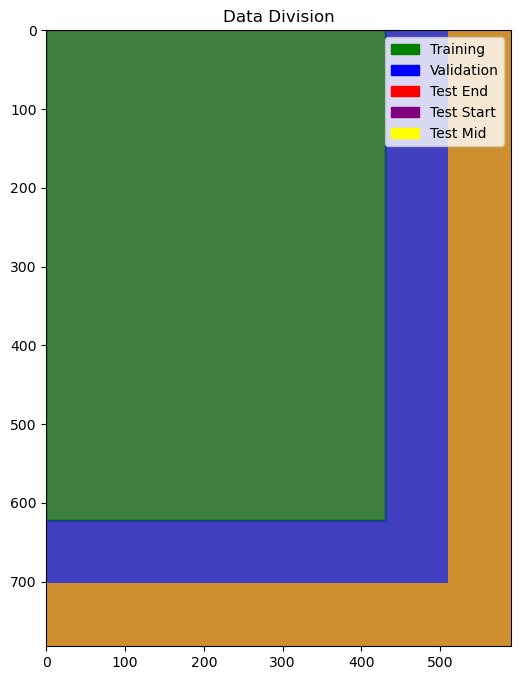

In [4]:
sizetrainx=622
sizetrainy=430
show_data_division(sizetrainx,sizetrainy)

In [15]:
def get_limits(start, end, num_limits):
    step_size = (end - start) / (num_limits + 1)

    limits = []
    for i in range(1, num_limits + 1):
        limit = start + i * step_size
        limits.append(int(limit))

    return limits

def show_smart_data_division(size_x=192,size_y=192,num_train=10):
    inicio_area_livre_x=size_x+80
    fim_area_livre_x=782
    inicio_area_livre_y=size_y+80
    fim_area_livre_y=590

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    plt.grid(False)

    ax.imshow(np.ones([782,590]), cmap='gray', alpha=0.5)

    # Train data
    rect = patches.Rectangle((0, 0), size_y, size_x, linewidth=2, edgecolor='purple', facecolor='purple', alpha=0.5)
    ax.add_patch(rect)


    x_limits = get_limits(inicio_area_livre_x, fim_area_livre_x, num_train)
    y_limits = get_limits(inicio_area_livre_y, fim_area_livre_y, num_train)
    
    for pos_x, pos_y in zip(x_limits, y_limits):

        rect = patches.Rectangle((pos_y, 0), 2, pos_x, linewidth=2, edgecolor='none', facecolor='purple', alpha=1)
        ax.add_patch(rect)

        rect = patches.Rectangle((0, pos_x), pos_y+2, 2, linewidth=2, edgecolor='none', facecolor='purple', alpha=1)
        ax.add_patch(rect)


    # Validation data
    rect = patches.Rectangle((size_y, 0), 80, size_x, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, size_x), size_y+80, 80, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
    ax.add_patch(rect)

    #Test
    rect = patches.Rectangle((inicio_area_livre_y, 0), fim_area_livre_y-inicio_area_livre_y, inicio_area_livre_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, inicio_area_livre_x), 590, fim_area_livre_x-inicio_area_livre_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)


    # Add legend
    train_patch = patches.Patch(color='purple', label='Training')
    val_patch = patches.Patch(color='b', label='Validation')
    test_patch = patches.Patch(color='yellow', label='Test')



    ax.legend(handles=[train_patch, val_patch, test_patch], loc='upper right')

    ax.set_xlim(0, 590)
    ax.set_ylim(782, 0)
    ax.set_title('Data Division')
    plt.show()

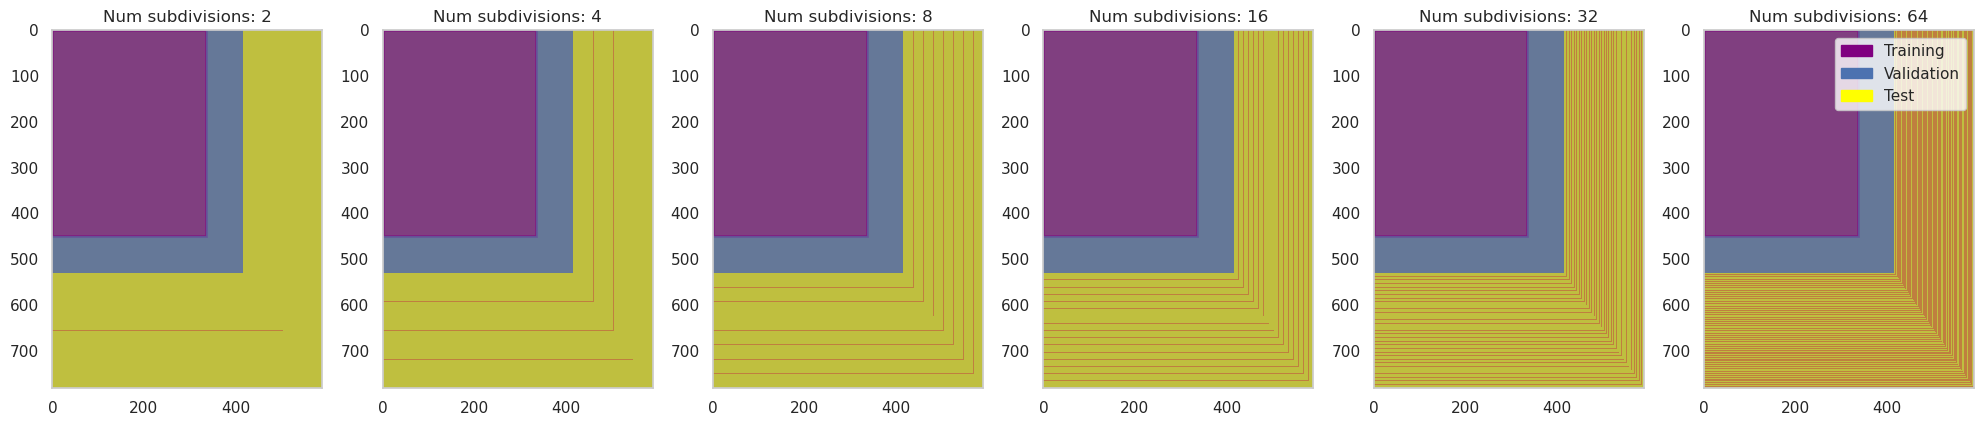

In [18]:
def show_smart_data_division_subplot(size_x=235, size_y=216):
    num_train_values = [1, 3, 7, 15, 31, 63]  # Different num_train values
    
    # Create subplots: 1 row, 6 columns
    fig, axs = plt.subplots(1, 6, figsize=(20, 6))
    plt.grid(False)
    
    inicio_area_livre_x = size_x + 80
    fim_area_livre_x = 782
    inicio_area_livre_y = size_y + 80
    fim_area_livre_y = 590

    for ax, num_train in zip(axs, num_train_values):
        ax.grid(False)
        ax.imshow(np.ones([782, 590]), cmap='gray', alpha=0.5)

        # Train data
        rect = patches.Rectangle((0, 0), size_y, size_x, linewidth=2, edgecolor='purple', facecolor='purple', alpha=0.5)
        ax.add_patch(rect)

        # Get train limits
        x_limits = get_limits(inicio_area_livre_x, fim_area_livre_x, num_train)
        y_limits = get_limits(inicio_area_livre_y, fim_area_livre_y, num_train)

        # Add purple rectangles for each position
        for pos_x, pos_y in zip(x_limits, y_limits):
            rect = patches.Rectangle((pos_y, 0), 2, pos_x, linewidth=2, edgecolor='none', facecolor='purple', alpha=1)
            ax.add_patch(rect)
            rect = patches.Rectangle((0, pos_x), pos_y + 2, 2, linewidth=2, edgecolor='none', facecolor='purple', alpha=1)
            ax.add_patch(rect)

        # Validation data
        rect = patches.Rectangle((size_y, 0), 80, size_x, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
        ax.add_patch(rect)
        rect = patches.Rectangle((0, size_x), size_y + 80, 80, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
        ax.add_patch(rect)

        # Test data
        rect = patches.Rectangle((inicio_area_livre_y, 0), fim_area_livre_y - inicio_area_livre_y, inicio_area_livre_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
        ax.add_patch(rect)
        rect = patches.Rectangle((0, inicio_area_livre_x), 590, fim_area_livre_x - inicio_area_livre_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
        ax.add_patch(rect)

        # Set title for each subplot
        ax.set_title(f'Num subdivisions: {num_train+1}')
        ax.set_xlim(0, 590)
        ax.set_ylim(782, 0)

    # Add legend to the last subplot
    train_patch = patches.Patch(color='purple', label='Training')
    val_patch = patches.Patch(color='b', label='Validation')
    test_patch = patches.Patch(color='yellow', label='Test')
    axs[-1].legend(handles=[train_patch, val_patch, test_patch], loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the function to display the plot
show_smart_data_division_subplot(450,336)

In [ ]:
show_smart_data_division(size_x=192,size_y=192,num_train=10)

In [24]:
import os
import re

# Define the path to your directory containing the files
directory_path = '/home/nunes/Seismic_Analysis_Tensorflow/results/train_slices_in_test_area/tables'

# Initialize dictionaries to store the F1 scores for each area and slice count
f1_scores_1_dict = {}
f1_scores_3_dict = {}
f1_scores_7_dict = {}
f1_scores_15_dict = {}
f1_scores_31_dict = {}
f1_scores_63_dict = {}

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        # Construct the full path to the file
        file_path = os.path.join(directory_path, filename)
        
        # Extract the area and slice count from the filename
        match = re.match(r'table_(\d+x\d+)_(\d+)_slice\.txt', filename)
        if match:
            area = match.group(1)
            slice_count = int(match.group(2))

            # Read the file and search for the line containing "Macro F1"
            with open(file_path, 'r') as file:
                for line in file:
                    if 'Micro F1' in line:
                        # Extract the F1 score value
                        f1_value = float(line.split()[2])
                        
                        # Append the value to the corresponding list based on slice count
                        if slice_count == 1:
                            f1_scores_1_dict.setdefault(area, []).append(f1_value)
                        elif slice_count == 3:
                            f1_scores_3_dict.setdefault(area, []).append(f1_value)
                        elif slice_count == 7:
                            f1_scores_7_dict.setdefault(area, []).append(f1_value)
                        elif slice_count == 15:
                            f1_scores_15_dict.setdefault(area, []).append(f1_value)
                        elif slice_count == 31:
                            f1_scores_31_dict.setdefault(area, []).append(f1_value)
                        elif slice_count == 63:
                            f1_scores_63_dict.setdefault(area, []).append(f1_value)

# Example: Print the results
print(f1_scores_1_dict)
print(f1_scores_3_dict)
print(f1_scores_7_dict)
print(f1_scores_15_dict)
print(f1_scores_31_dict)
print(f1_scores_63_dict)

#450x336 31



{'321x264': [0.8929839913864076], '364x288': [0.8937677943758723], '407x312': [0.9089304672922106], '235x216': [0.8576894496586929], '536x384': [0.940500814817221], '493x360': [0.932965921377013], '192x192': [0.8618132761670072], '278x240': [0.8471634867784963], '450x336': [0.9171940355917795], '579x408': [0.9511699878084043]}
{'407x312': [0.9351703441418848], '235x216': [0.9097077478466905], '536x384': [0.9619303870369676], '364x288': [0.9230926576985602], '579x408': [0.9692706038104472], '321x264': [0.9281963352687669], '493x360': [0.9529174548661499], '278x240': [0.9165529352468551], '450x336': [0.9564554966009571], '192x192': [0.8695618306405466]}
{'493x360': [0.9627614656262051], '536x384': [0.9698783571692662], '278x240': [0.9453267380710851], '321x264': [0.9569478275283739], '579x408': [0.9799100212788193], '235x216': [0.9425525725025712], '450x336': [0.9611149024172703], '407x312': [0.9464021680576553], '364x288': [0.9498895236212512], '192x192': [0.9072914383154513]}
{'407x312

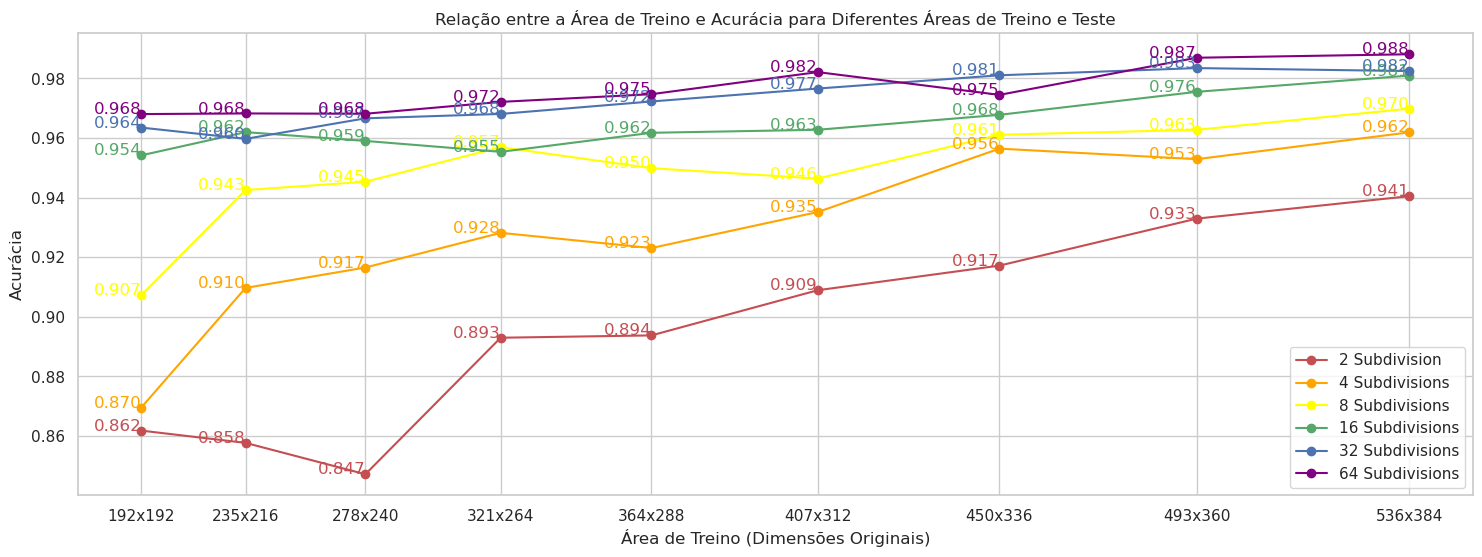

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Listas de áreas e múltiplas listas de F1 scores
areas = ['192x192', '235x216', '278x240', '321x264', '364x288', '407x312', '450x336', '493x360', '536x384']#,'579x408','622x430']

# Três diferentes listas de F1 scores
f1_slice_1=values_dict_to_list(f1_scores_1_dict)[:9]
f1_slice_3=values_dict_to_list(f1_scores_3_dict)[:9]
f1_slice_7=values_dict_to_list(f1_scores_7_dict)[:9]
f1_slice_15=values_dict_to_list(f1_scores_15_dict)[:9]
f1_slice_31=values_dict_to_list(f1_scores_31_dict)[:9]
f1_slice_63=values_dict_to_list(f1_scores_63_dict)[:9]



# Convertendo áreas para uma métrica numérica
areas_numerical = [int(area.split('x')[0]) * int(area.split('x')[1]) for area in areas]

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de linha
plt.figure(figsize=(18, 6))

# Plotando as três listas de F1 scores com cores diferentes
plt.plot(areas_numerical, f1_slice_1, marker='o', linestyle='-', color='r', label='2 Subdivision')
plt.plot(areas_numerical, f1_slice_3, marker='o', linestyle='-', color='orange', label='4 Subdivisions')
plt.plot(areas_numerical, f1_slice_7, marker='o', linestyle='-', color='yellow', label='8 Subdivisions')
plt.plot(areas_numerical, f1_slice_15, marker='o', linestyle='-', color='g', label='16 Subdivisions')
plt.plot(areas_numerical, f1_slice_31, marker='o', linestyle='-', color='b', label='32 Subdivisions')
plt.plot(areas_numerical, f1_slice_63, marker='o', linestyle='-', color='purple', label='64 Subdivisions')


# Adicionando os valores de F1 no gráfico para cada linha
for i, (area, f1_1, f1_3, f1_7,f1_15,f1_31,f1_63) in enumerate(zip(areas_numerical, f1_slice_1, f1_slice_3, f1_slice_7,f1_slice_15,f1_slice_31,f1_slice_63)):
    plt.text(area, f1_1, f'{f1_1:.3f}', fontsize=12, ha='right', color='r')
    plt.text(area, f1_3, f'{f1_3:.3f}', fontsize=12, ha='right', color='orange')
    plt.text(area, f1_7, f'{f1_7:.3f}', fontsize=12, ha='right', color='yellow')
    plt.text(area, f1_15, f'{f1_15:.3f}', fontsize=12, ha='right', color='g')
    plt.text(area, f1_31, f'{f1_31:.3f}', fontsize=12, ha='right', color='b')
    plt.text(area, f1_63, f'{f1_63:.3f}', fontsize=12, ha='right', color='purple')

# Ajustando os labels do eixo x para mostrar as áreas originais
plt.xticks(areas_numerical, areas)

# Títulos e labels
plt.title('Relação entre a Área de Treino e Acurácia para Diferentes Áreas de Treino e Teste')
plt.xlabel('Área de Treino (Dimensões Originais)')
plt.ylabel('Acurácia')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()


In [26]:
import pandas as pd

def display_table_subdivisions(areas, f1_slice_1, f1_slice_3, f1_slice_7, f1_slice_15, f1_slice_31, f1_slice_63):
    # Create a dictionary to store the table data
    table_data = {
        'Subdivisions': ['2 Subdivisions', '4 Subdivisions', '8 Subdivisions', '16 Subdivisions', '32 Subdivisions', '64 Subdivisions']
    }
    
    # Loop through each area and add the corresponding data to the dictionary
    for i, area in enumerate(areas):
        table_data[area] = [
            f'{f1_slice_1[i]:.3f}',  # F1 score for 2 Subdivisions
            f'{f1_slice_3[i]:.3f}',  # F1 score for 4 Subdivisions
            f'{f1_slice_7[i]:.3f}',  # F1 score for 8 Subdivisions
            f'{f1_slice_15[i]:.3f}',  # F1 score for 16 Subdivisions
            f'{f1_slice_31[i]:.3f}',  # F1 score for 32 Subdivisions
            f'{f1_slice_63[i]:.3f}'   # F1 score for 64 Subdivisions
        ]
    
    # Convert the dictionary to a pandas DataFrame
    df = pd.DataFrame(table_data)
    return df

# Call the function to display the table
display_table_subdivisions(areas, f1_slice_1, f1_slice_3, f1_slice_7, f1_slice_15, f1_slice_31, f1_slice_63)


,Subdivisions,192x192,235x216,278x240,321x264,364x288,407x312,450x336,493x360,536x384
0,2 Subdivisions,0.862,0.858,0.847,0.893,0.894,0.909,0.917,0.933,0.941
1,4 Subdivisions,0.870,0.910,0.917,0.928,0.923,0.935,0.956,0.953,0.962
2,8 Subdivisions,0.907,0.943,0.945,0.957,0.950,0.946,0.961,0.963,0.970
3,16 Subdivisions,0.954,0.962,0.959,0.955,0.962,0.963,0.968,0.976,0.981
4,32 Subdivisions,0.964,0.960,0.967,0.968,0.972,0.977,0.981,0.983,0.982
5,64 Subdivisions,0.968,0.968,0.968,0.972,0.975,0.982,0.975,0.987,0.988


## Graficos gerais

In [5]:
import os
import re

# Define the path to your directory containing the files
directory_path = '/home/nunes/Seismic_Analysis_Tensorflow/results/training_size_variation_parihaka/tables'

# Initialize dictionaries to store the F1 scores for each area and position
f1_scores_start_dict = {}
f1_scores_start_2_dict = {}
f1_scores_start_3_dict = {}

f1_scores_mid_dict = {}
f1_scores_mid_2_dict = {}
f1_scores_mid_3_dict = {}

f1_scores_end_dict = {}
f1_scores_end_2_dict = {}
f1_scores_end_3_dict = {}

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        # Construct the full path to the file
        file_path = os.path.join(directory_path, filename)
        
        # Extract the area, position, and version (if any) from the filename
        match = re.match(r'table_(\d+x\d+)_(start|mid|end)(_?\d*)\.txt', filename)
        if match:
            area = match.group(1)
            position = match.group(2)
            version = match.group(3)

            # Read the file and search for the line containing "Macro F1"
            with open(file_path, 'r') as file:
                for line in file:
                    if 'Macro F1' in line:
                        # Extract the F1 score value
                        f1_value = float(line.split()[2])
                        
                        # Append the value to the corresponding list based on position and version
                        if position == 'start':
                            if version == '':
                                f1_scores_start_dict.setdefault(area, []).append(f1_value)
                            elif version == '_2':
                                f1_scores_start_2_dict.setdefault(area, []).append(f1_value)
                            elif version == '_3':
                                f1_scores_start_3_dict.setdefault(area, []).append(f1_value)
                        elif position == 'mid':
                            if version == '':
                                f1_scores_mid_dict.setdefault(area, []).append(f1_value)
                            elif version == '_2':
                                f1_scores_mid_2_dict.setdefault(area, []).append(f1_value)
                            elif version == '_3':
                                f1_scores_mid_3_dict.setdefault(area, []).append(f1_value)
                        elif position == 'end':
                            if version == '':
                                f1_scores_end_dict.setdefault(area, []).append(f1_value)
                            elif version == '_2':
                                f1_scores_end_2_dict.setdefault(area, []).append(f1_value)
                            elif version == '_3':
                                f1_scores_end_3_dict.setdefault(area, []).append(f1_value)


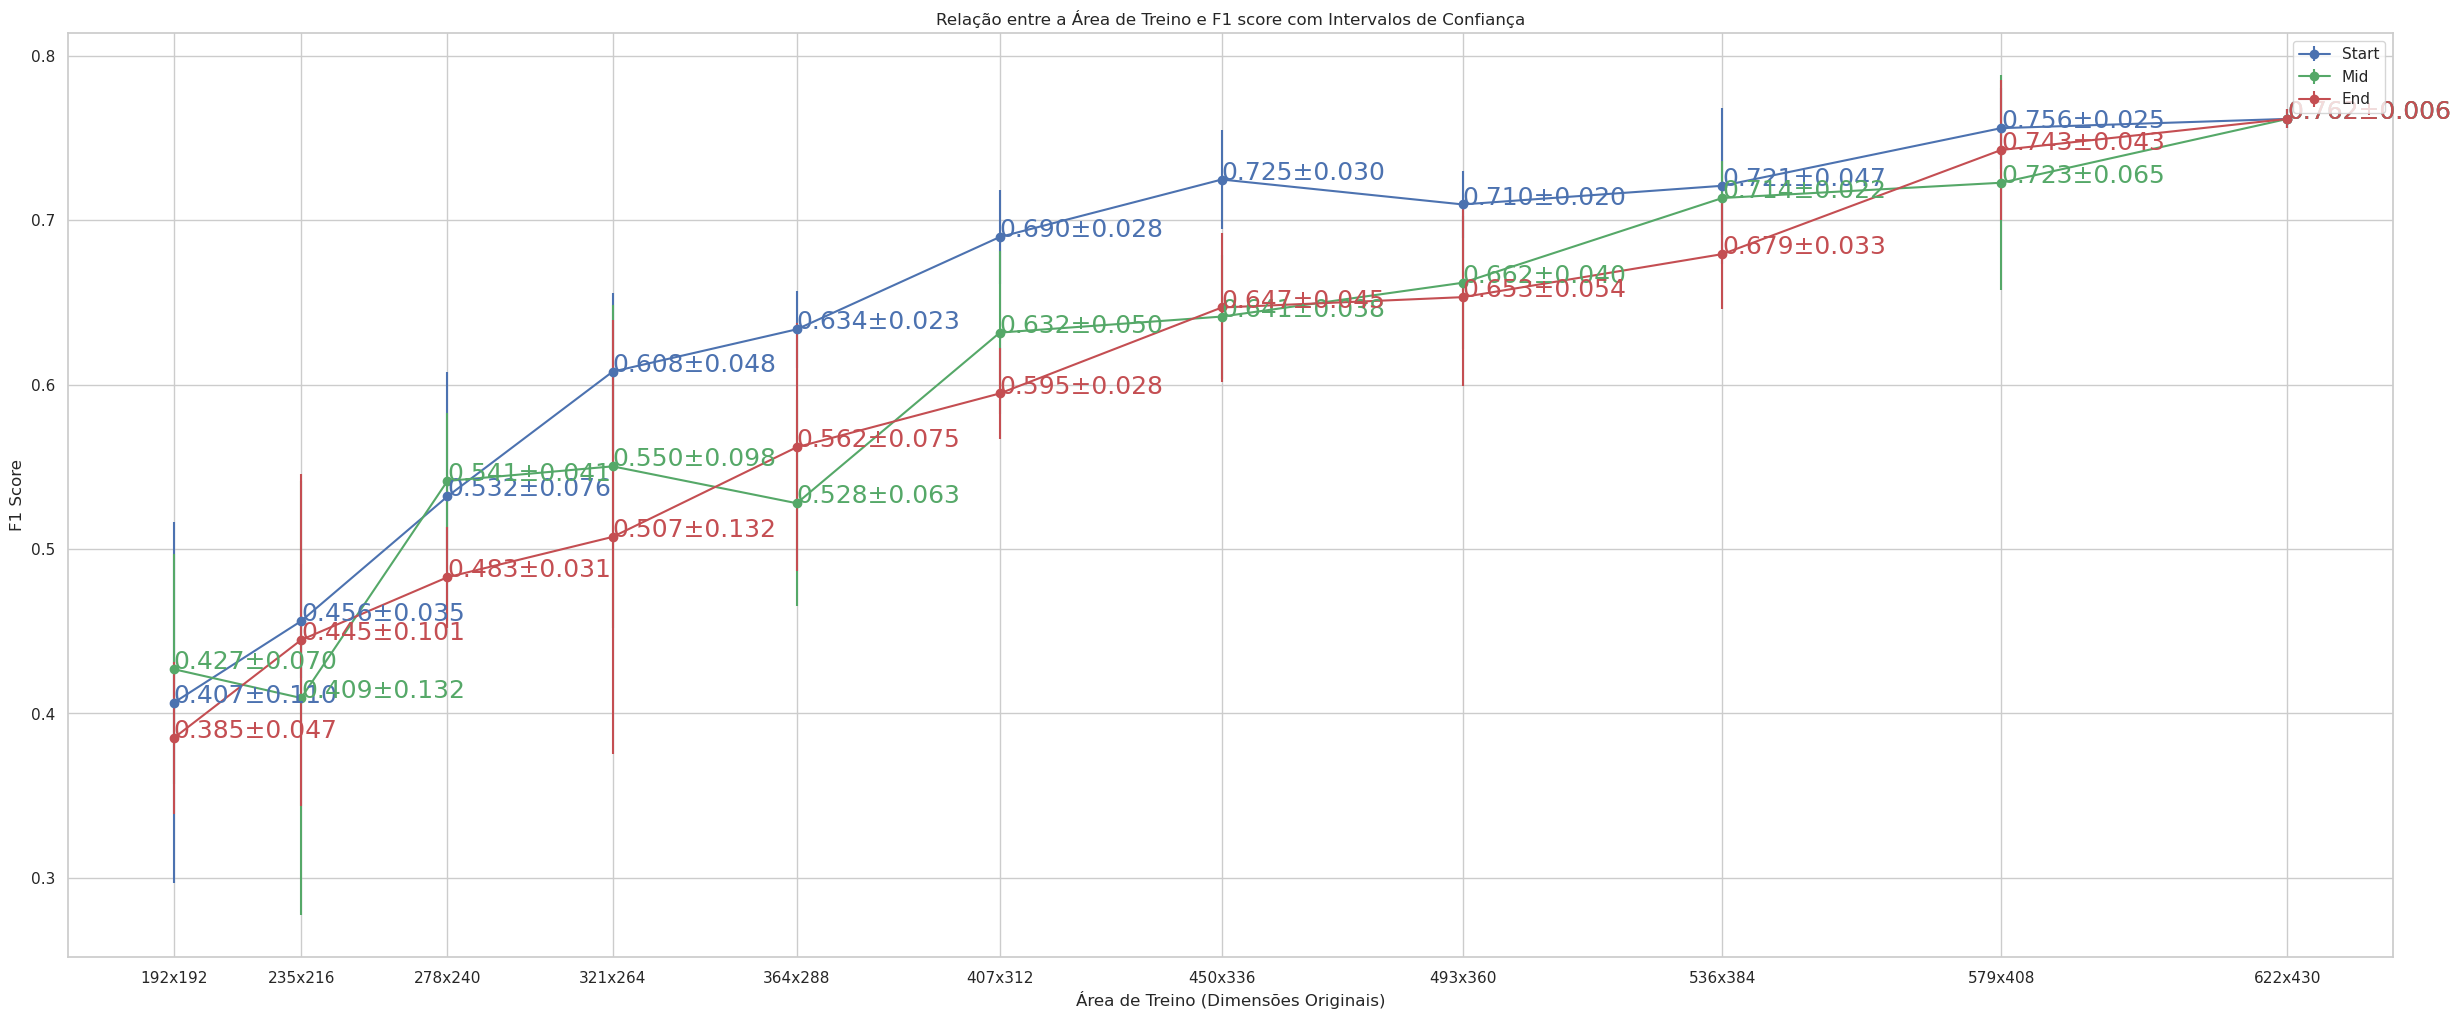

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem, t

# Listas de áreas
areas = ['192x192', '235x216', '278x240', '321x264', '364x288', '407x312', '450x336', '493x360', '536x384','579x408','622x430']

# Três diferentes listas de F1 scores para cada posição
f1_score_start_1 = values_dict_to_list(f1_scores_start_dict) + [0.763]
f1_score_start_2 = values_dict_to_list(f1_scores_start_2_dict) + [0.759]
f1_score_start_3 = values_dict_to_list(f1_scores_start_3_dict) + [0.763]

f1_score_mid_1 = values_dict_to_list(f1_scores_mid_dict) + [0.763]
f1_score_mid_2 = values_dict_to_list(f1_scores_mid_2_dict) + [0.759]
f1_score_mid_3 = values_dict_to_list(f1_scores_mid_3_dict) + [0.763]

f1_score_end_1 = values_dict_to_list(f1_scores_end_dict) + [0.763]
f1_score_end_2 = values_dict_to_list(f1_scores_end_2_dict) + [0.759]
f1_score_end_3 = values_dict_to_list(f1_scores_end_3_dict) + [0.763]


# Convertendo áreas para uma métrica numérica
areas_numerical = [int(area.split('x')[0]) * int(area.split('x')[1]) for area in areas]

# Calculando as médias e intervalos de confiança para cada ponto
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = sem(data)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return mean, mean-h, mean+h

f1_scores_start = [mean_confidence_interval([f1_score_start_1[i], f1_score_start_2[i], f1_score_start_3[i]]) for i in range(len(f1_score_start_1))]
f1_scores_mid = [mean_confidence_interval([f1_score_mid_1[i], f1_score_mid_2[i], f1_score_mid_3[i]]) for i in range(len(f1_score_mid_1))]
f1_scores_end = [mean_confidence_interval([f1_score_end_1[i], f1_score_end_2[i], f1_score_end_3[i]]) for i in range(len(f1_score_end_1))]

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de linha
plt.figure(figsize=(30, 12))

# Plotando as três listas de F1 scores com intervalos de confiança
plt.errorbar(areas_numerical, [x[0] for x in f1_scores_start], 
             yerr=[[x[0]-x[1] for x in f1_scores_start], [x[2]-x[0] for x in f1_scores_start]], 
             fmt='-o', color='b', label='Start')

plt.errorbar(areas_numerical, [x[0] for x in f1_scores_mid], 
             yerr=[[x[0]-x[1] for x in f1_scores_mid], [x[2]-x[0] for x in f1_scores_mid]], 
             fmt='-o', color='g', label='Mid')

plt.errorbar(areas_numerical, [x[0] for x in f1_scores_end], 
             yerr=[[x[0]-x[1] for x in f1_scores_end], [x[2]-x[0] for x in f1_scores_end]], 
             fmt='-o', color='r', label='End')

# Adicionando os valores ao lado de cada ponto
for i in range(len(areas_numerical)):
    mean_start, lower_start, upper_start = f1_scores_start[i]
    mean_mid, lower_mid, upper_mid = f1_scores_mid[i]
    mean_end, lower_end, upper_end = f1_scores_end[i]

    plt.text(areas_numerical[i], mean_start, f'{mean_start:.3f}±{upper_start-mean_start:.3f}', fontsize=18, ha='left', color='b')
    plt.text(areas_numerical[i], mean_mid, f'{mean_mid:.3f}±{upper_mid-mean_mid:.3f}', fontsize=18, ha='left', color='g')
    plt.text(areas_numerical[i], mean_end, f'{mean_end:.3f}±{upper_end-mean_end:.3f}', fontsize=18, ha='left', color='r')

# Ajustando os labels do eixo x para mostrar as áreas originais
plt.xticks(areas_numerical, areas)

# Títulos e labels
plt.title('Relação entre a Área de Treino e F1 score com Intervalos de Confiança')
plt.xlabel('Área de Treino (Dimensões Originais)')
plt.ylabel('F1 Score')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()


In [10]:
import pandas as pd

def display_pos_table(areas, f1_scores_start, f1_scores_mid, f1_scores_end):
    # Create a dictionary to store the table data
    table_data = {
        'Position': ['Start', 'Mid', 'End']
    }
    
    # Loop through each area and add the corresponding data to the dictionary
    for i, area in enumerate(areas):
        start_mean, start_lower, start_upper = f1_scores_start[i]
        mid_mean, mid_lower, mid_upper = f1_scores_mid[i]
        end_mean, end_lower, end_upper = f1_scores_end[i]
        
        table_data[area] = [
            f'{start_mean:.3f} ± {start_upper-start_mean:.3f}',
            f'{mid_mean:.3f} ± {mid_upper-mid_mean:.3f}',
            f'{end_mean:.3f} ± {end_upper-end_mean:.3f}'
        ]
    
    # Convert the dictionary to a pandas DataFrame
    df = pd.DataFrame(table_data)
    
    # Display the table
    return df

# Call the function to display the table
table=display_pos_table(areas, f1_scores_start, f1_scores_mid, f1_scores_end)
table

,Position,192x192,235x216,278x240,321x264,364x288,407x312,450x336,493x360,536x384,579x408,622x430
0,Start,0.407 ± 0.110,0.456 ± 0.035,0.532 ± 0.076,0.608 ± 0.048,0.634 ± 0.023,0.690 ± 0.028,0.725 ± 0.030,0.710 ± 0.020,0.721 ± 0.047,0.756 ± 0.025,0.762 ± 0.006
1,Mid,0.427 ± 0.070,0.409 ± 0.132,0.541 ± 0.041,0.550 ± 0.098,0.528 ± 0.063,0.632 ± 0.050,0.641 ± 0.038,0.662 ± 0.040,0.714 ± 0.022,0.723 ± 0.065,0.762 ± 0.006
2,End,0.385 ± 0.047,0.445 ± 0.101,0.483 ± 0.031,0.507 ± 0.132,0.562 ± 0.075,0.595 ± 0.028,0.647 ± 0.045,0.653 ± 0.054,0.679 ± 0.033,0.743 ± 0.043,0.762 ± 0.006


In [11]:
import os
import re

# Define the path to your directory containing the files
directory_path = '/home/nunes/Seismic_Analysis_Tensorflow/results/training_size_variation_parihaka/tables'

# Initialize dictionaries to store the acc scores for each area and position
acc_scores_start_dict = {}
acc_scores_start_2_dict = {}
acc_scores_start_3_dict = {}

acc_scores_mid_dict = {}
acc_scores_mid_2_dict = {}
acc_scores_mid_3_dict = {}

acc_scores_end_dict = {}
acc_scores_end_2_dict = {}
acc_scores_end_3_dict = {}

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        # Construct the full path to the file
        file_path = os.path.join(directory_path, filename)
        
        # Extract the area, position, and version (if any) from the filename
        match = re.match(r'table_(\d+x\d+)_(start|mid|end)(_?\d*)\.txt', filename)
        if match:
            area = match.group(1)
            position = match.group(2)
            version = match.group(3)

            # Read the file and search for the line containing Micro F1"
            with open(file_path, 'r') as file:
                for line in file:
                    if 'Micro F1' in line:
                        # Extract the acc score value
                        acc_value = float(line.split()[2])
                        
                        # Append the value to the corresponding list based on position and version
                        if position == 'start':
                            if version == '':
                                acc_scores_start_dict.setdefault(area, []).append(acc_value)
                            elif version == '_2':
                                acc_scores_start_2_dict.setdefault(area, []).append(acc_value)
                            elif version == '_3':
                                acc_scores_start_3_dict.setdefault(area, []).append(acc_value)
                        elif position == 'mid':
                            if version == '':
                                acc_scores_mid_dict.setdefault(area, []).append(acc_value)
                            elif version == '_2':
                                acc_scores_mid_2_dict.setdefault(area, []).append(acc_value)
                            elif version == '_3':
                                acc_scores_mid_3_dict.setdefault(area, []).append(acc_value)
                        elif position == 'end':
                            if version == '':
                                acc_scores_end_dict.setdefault(area, []).append(acc_value)
                            elif version == '_2':
                                acc_scores_end_2_dict.setdefault(area, []).append(acc_value)
                            elif version == '_3':
                                acc_scores_end_3_dict.setdefault(area, []).append(acc_value)


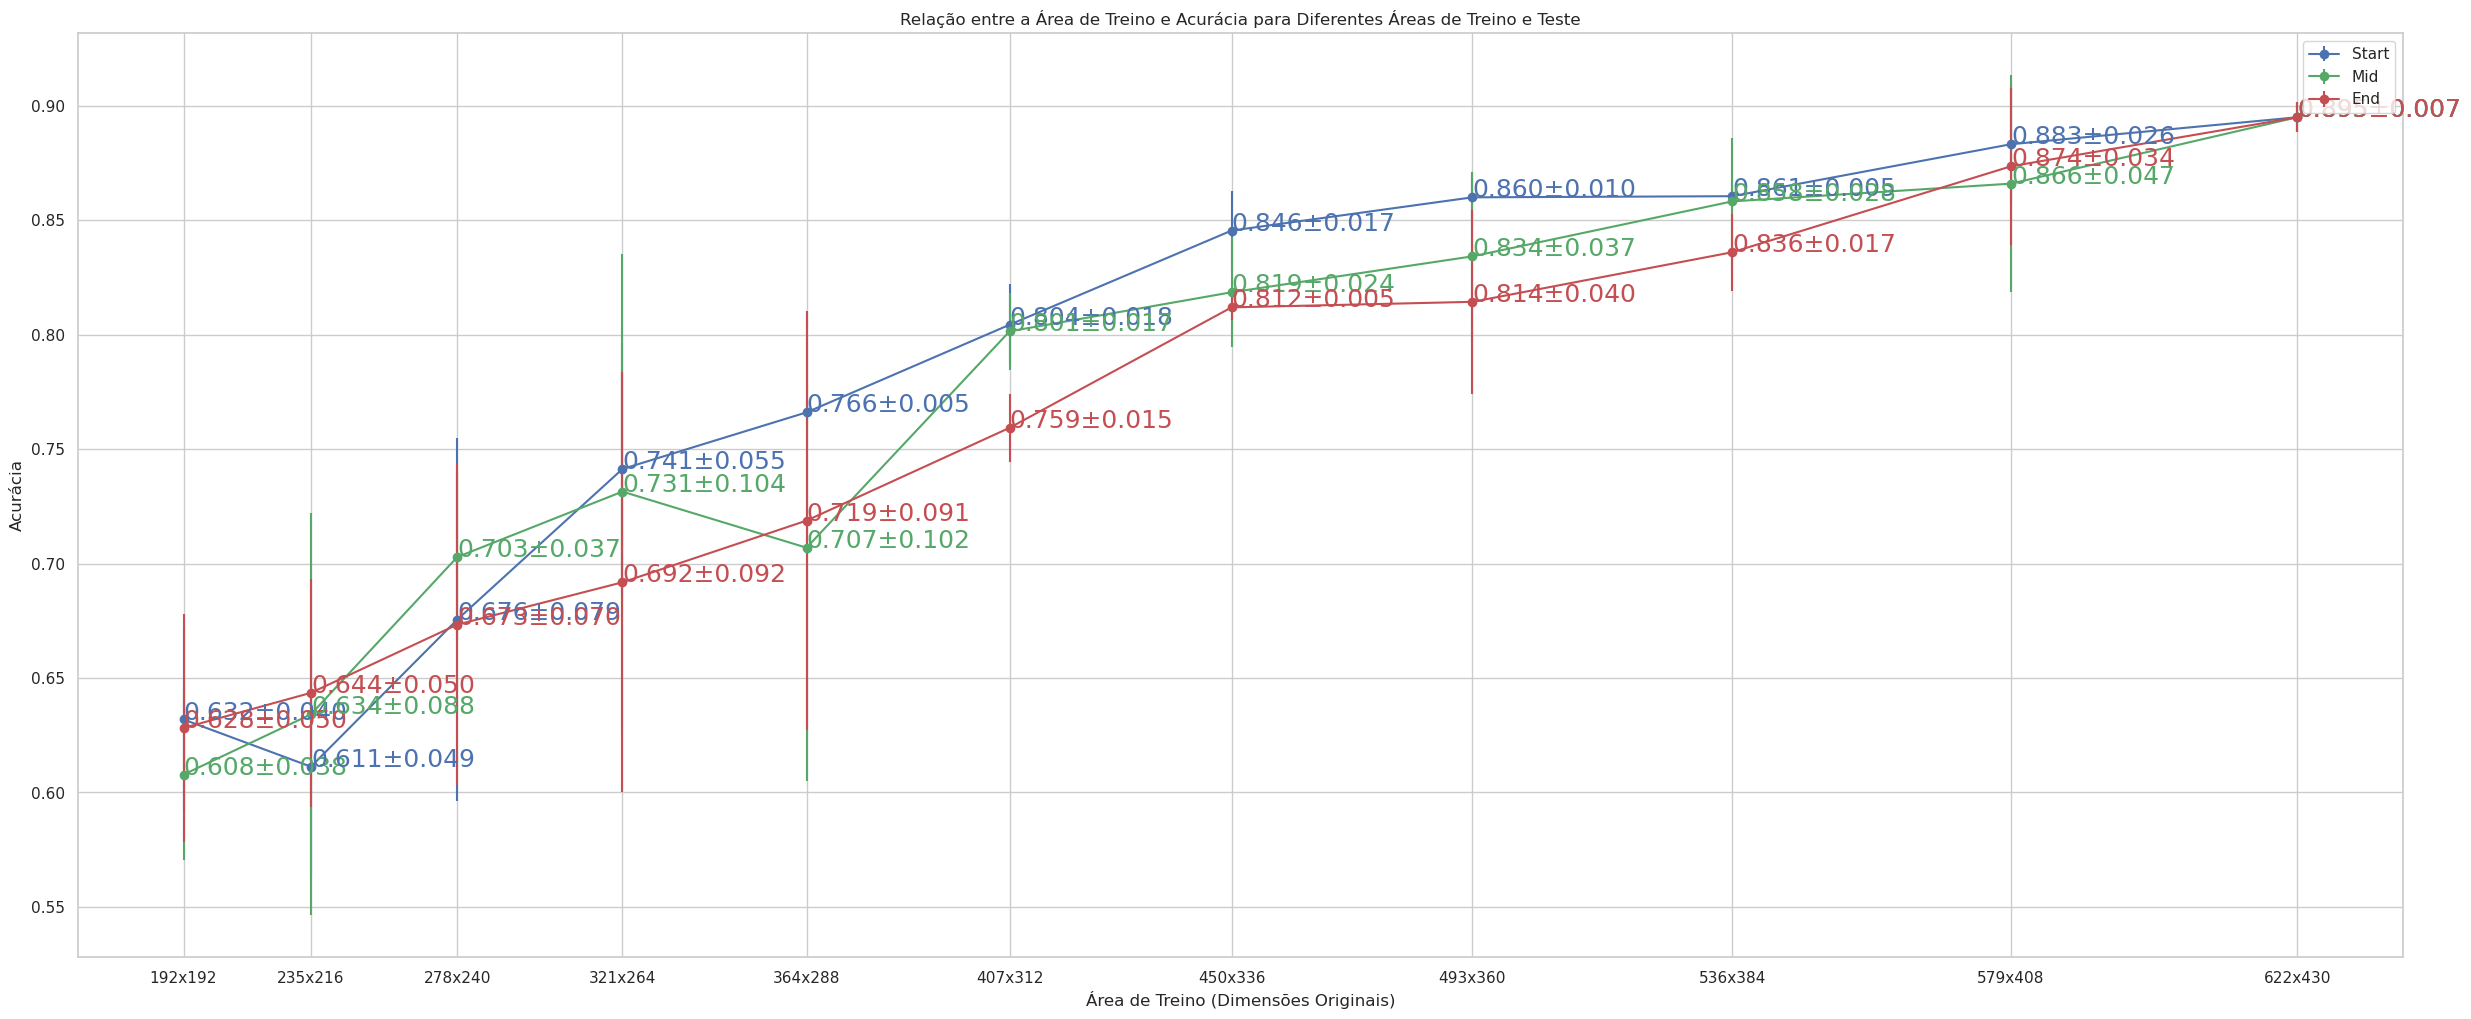

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem, t

# Listas de áreas
areas = ['192x192', '235x216', '278x240', '321x264', '364x288', '407x312', '450x336', '493x360', '536x384','579x408','622x430']

# Três diferentes listas de acc scores para cada posição
acc_score_start_1 = values_dict_to_list(acc_scores_start_dict) + [0.896]
acc_score_start_2 = values_dict_to_list(acc_scores_start_2_dict) + [0.897]
acc_score_start_3 = values_dict_to_list(acc_scores_start_3_dict) + [0.892]

acc_score_mid_1 = values_dict_to_list(acc_scores_mid_dict) + [0.896]
acc_score_mid_2 = values_dict_to_list(acc_scores_mid_2_dict) + [0.897]
acc_score_mid_3 = values_dict_to_list(acc_scores_mid_3_dict) + [0.892]

acc_score_end_1 = values_dict_to_list(acc_scores_end_dict) + [0.896]
acc_score_end_2 = values_dict_to_list(acc_scores_end_2_dict) + [0.897]
acc_score_end_3 = values_dict_to_list(acc_scores_end_3_dict) + [0.892]


# Convertendo áreas para uma métrica numérica
areas_numerical = [int(area.split('x')[0]) * int(area.split('x')[1]) for area in areas]

# Calculando as médias e intervalos de confiança para cada ponto
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = sem(data)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return mean, mean-h, mean+h

acc_scores_start = [mean_confidence_interval([acc_score_start_1[i], acc_score_start_2[i], acc_score_start_3[i]]) for i in range(len(acc_score_start_1))]
acc_scores_mid = [mean_confidence_interval([acc_score_mid_1[i], acc_score_mid_2[i], acc_score_mid_3[i]]) for i in range(len(acc_score_mid_1))]
acc_scores_end = [mean_confidence_interval([acc_score_end_1[i], acc_score_end_2[i], acc_score_end_3[i]]) for i in range(len(acc_score_end_1))]

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de linha
plt.figure(figsize=(30, 12))

# Plotando as três listas de acc scores com intervalos de confiança
plt.errorbar(areas_numerical, [x[0] for x in acc_scores_start], 
             yerr=[[x[0]-x[1] for x in acc_scores_start], [x[2]-x[0] for x in acc_scores_start]], 
             fmt='-o', color='b', label='Start')

plt.errorbar(areas_numerical, [x[0] for x in acc_scores_mid], 
             yerr=[[x[0]-x[1] for x in acc_scores_mid], [x[2]-x[0] for x in acc_scores_mid]], 
             fmt='-o', color='g', label='Mid')

plt.errorbar(areas_numerical, [x[0] for x in acc_scores_end], 
             yerr=[[x[0]-x[1] for x in acc_scores_end], [x[2]-x[0] for x in acc_scores_end]], 
             fmt='-o', color='r', label='End')

# Adicionando os valores ao lado de cada ponto
for i in range(len(areas_numerical)):
    mean_start, lower_start, upper_start = acc_scores_start[i]
    mean_mid, lower_mid, upper_mid = acc_scores_mid[i]
    mean_end, lower_end, upper_end = acc_scores_end[i]

    plt.text(areas_numerical[i], mean_start, f'{mean_start:.3f}±{upper_start-mean_start:.3f}', fontsize=18, ha='left', color='b')
    plt.text(areas_numerical[i], mean_mid, f'{mean_mid:.3f}±{upper_mid-mean_mid:.3f}', fontsize=18, ha='left', color='g')
    plt.text(areas_numerical[i], mean_end, f'{mean_end:.3f}±{upper_end-mean_end:.3f}', fontsize=18, ha='left', color='r')

# Ajustando os labels do eixo x para mostrar as áreas originais
plt.xticks(areas_numerical, areas)
# Ajustando os labels do eixo x para mostrar as áreas originais
plt.xticks(areas_numerical, areas)

# Títulos e labels
plt.title('Relação entre a Área de Treino e Acurácia para Diferentes Áreas de Treino e Teste')
plt.xlabel('Área de Treino (Dimensões Originais)')
plt.ylabel('Acurácia')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()


In [13]:
table=display_pos_table(areas, acc_scores_start, acc_scores_mid, acc_scores_end)
table

,Position,192x192,235x216,278x240,321x264,364x288,407x312,450x336,493x360,536x384,579x408,622x430
0,Start,0.632 ± 0.040,0.611 ± 0.049,0.676 ± 0.079,0.741 ± 0.055,0.766 ± 0.005,0.804 ± 0.018,0.846 ± 0.017,0.860 ± 0.010,0.861 ± 0.005,0.883 ± 0.026,0.895 ± 0.007
1,Mid,0.608 ± 0.038,0.634 ± 0.088,0.703 ± 0.037,0.731 ± 0.104,0.707 ± 0.102,0.801 ± 0.017,0.819 ± 0.024,0.834 ± 0.037,0.858 ± 0.028,0.866 ± 0.047,0.895 ± 0.007
2,End,0.628 ± 0.050,0.644 ± 0.050,0.673 ± 0.070,0.692 ± 0.092,0.719 ± 0.091,0.759 ± 0.015,0.812 ± 0.005,0.814 ± 0.040,0.836 ± 0.017,0.874 ± 0.034,0.895 ± 0.007


In [31]:
""" import matplotlib.pyplot as plt
import seaborn as sns

# Listas de áreas e múltiplas listas de F1 scores
areas = ['192x192', '235x216', '278x240', '321x264', '364x288', '407x312', '450x336', '493x360', '536x384','579x408','622x430']

# Três diferentes listas de F1 scores

acc_start = [0.639,0.632,0.653,0.715,0.763,0.801,0.839,0.863,0.858,0.871,0.896]
acc_mid = [0.598,0.655,0.696,0.715,0.673,0.798,0.815,0.850,0.854,0.869,0.896]
acc_end = [0.621,0.640,0.687,0.683,0.695,0.753,0.811,0.817,0.843,0.872,0.896]

# Convertendo áreas para uma métrica numérica
areas_numerical = [int(area.split('x')[0]) * int(area.split('x')[1]) for area in areas]

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de linha
plt.figure(figsize=(18, 6))

# Plotando as três listas de F1 scores com cores diferentes
plt.plot(areas_numerical, acc_start, marker='o', linestyle='-', color='b', label='Start')
plt.plot(areas_numerical, acc_mid, marker='o', linestyle='-', color='g', label='Mid')
plt.plot(areas_numerical, acc_end, marker='o', linestyle='-', color='r', label='End')

# Adicionando os valores de F1 no gráfico para cada linha
for i, (area, f1_1, f1_2, f1_3) in enumerate(zip(areas_numerical, acc_start, acc_mid, acc_end)):
    plt.text(area, f1_1, f'{f1_1:.2f}', fontsize=12, ha='right', color='b')
    plt.text(area, f1_2, f'{f1_2:.2f}', fontsize=12, ha='right', color='g')
    plt.text(area, f1_3, f'{f1_3:.2f}', fontsize=12, ha='right', color='r')

# Ajustando os labels do eixo x para mostrar as áreas originais
plt.xticks(areas_numerical, areas)

# Títulos e labels
plt.title('Relação entre a Área de Treino e Acurácia para Diferentes Áreas de Treino e Teste')
plt.xlabel('Área de Treino (Dimensões Originais)')
plt.ylabel('Acurácia')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()
 """

' import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Listas de áreas e múltiplas listas de F1 scores\nareas = [\'192x192\', \'235x216\', \'278x240\', \'321x264\', \'364x288\', \'407x312\', \'450x336\', \'493x360\', \'536x384\',\'579x408\',\'622x430\']\n\n# Três diferentes listas de F1 scores\n\nacc_start = [0.639,0.632,0.653,0.715,0.763,0.801,0.839,0.863,0.858,0.871,0.896]\nacc_mid = [0.598,0.655,0.696,0.715,0.673,0.798,0.815,0.850,0.854,0.869,0.896]\nacc_end = [0.621,0.640,0.687,0.683,0.695,0.753,0.811,0.817,0.843,0.872,0.896]\n\n# Convertendo áreas para uma métrica numérica\nareas_numerical = [int(area.split(\'x\')[0]) * int(area.split(\'x\')[1]) for area in areas]\n\n# Configurando o estilo do gráfico\nsns.set(style="whitegrid")\n\n# Criando o gráfico de linha\nplt.figure(figsize=(18, 6))\n\n# Plotando as três listas de F1 scores com cores diferentes\nplt.plot(areas_numerical, acc_start, marker=\'o\', linestyle=\'-\', color=\'b\', label=\'Start\')\nplt.plot(areas_numerical,